Column Names: Index(['date', 'MMM', 'ACE', 'ABT', 'ANF', 'ADBE', 'AMD', 'AES', 'AET', 'AFL',
       ...
       'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'YHOO', 'YUM', 'ZMH',
       'ZION'],
      dtype='object', length=472)


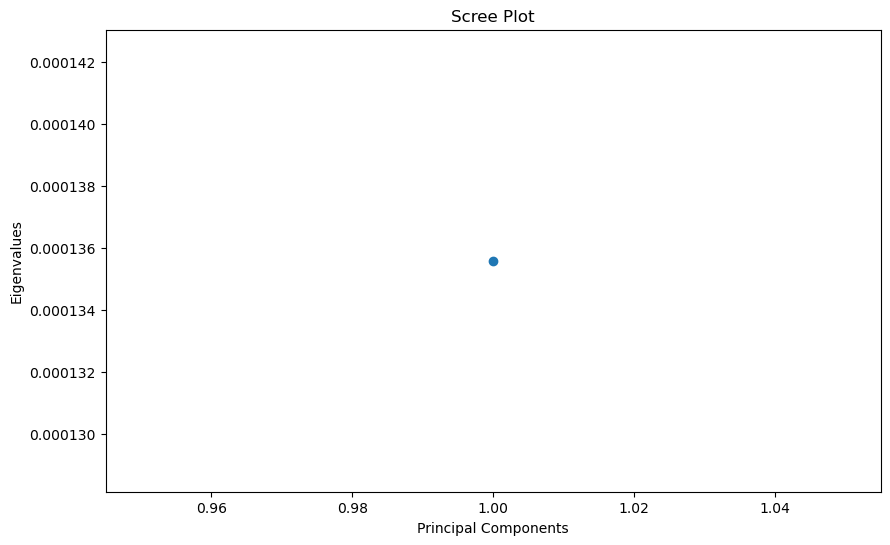

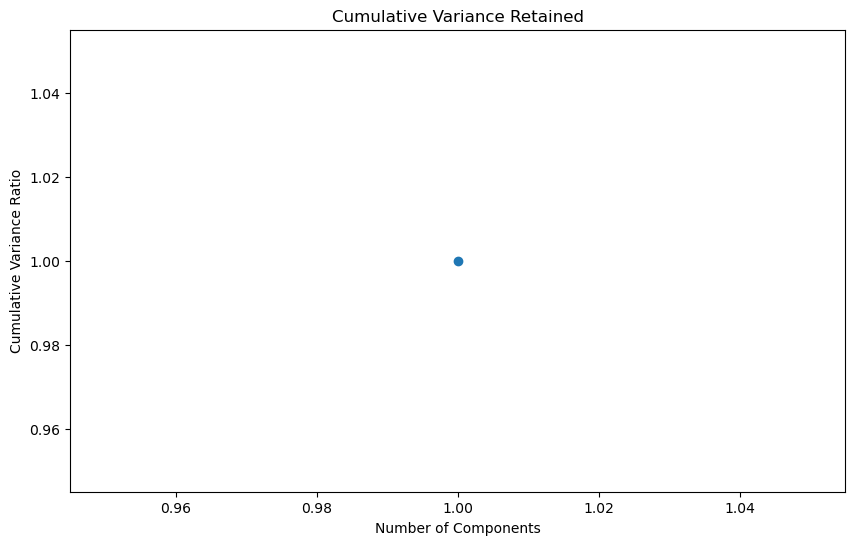

Number of components to capture at least 80% of variance: 1


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Path to the dataset file
df = pd.read_csv('SP500_close_price_no_missing.csv')

# Print column names to identify the correct column for stock prices
print("Column Names:", df.columns)

# Choose a stock symbol from the available columns
stock_symbol = 'MMM'

# Derive log returns
df['Log_Return'] = np.log(df[stock_symbol].shift(-1) / df[stock_symbol])

# Drop the last row as it will have NaN value after log return calculation
df = df.dropna()

# Extract log returns as features for PCA
X = df[['Log_Return']].values

# Fit a PCA model
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()

# Create a plot showing cumulative variance retained
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Variance Retained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()

# Find the number of components needed to capture at least 80% of the variance
n_components_80 = np.argmax(cumulative_variance_ratio >= 0.8) + 1

print(f'Number of components to capture at least 80% of variance: {n_components_80}')


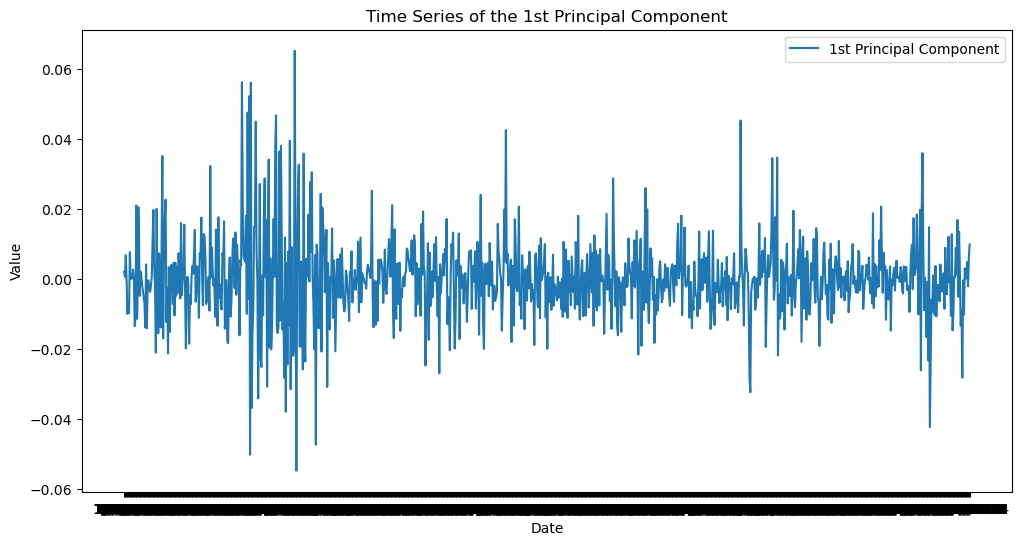

Date with the lowest value for the 1st principal component: 10/26/2011
Lowest value for the 1st principal component: -0.0548203918646475

Conduct research on the Internet to identify events explaining the observed behavior.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Path to the dataset file
df = pd.read_csv('SP500_close_price_no_missing.csv')

# Choose a stock symbol from the available columns
stock_symbol = 'MMM'

# Derive log returns
df['Log_Return'] = np.log(df[stock_symbol].shift(-1) / df[stock_symbol])

# Drop the last row as it will have NaN value after log return calculation
df = df.dropna()

# Extract log returns as features for PCA
X = df[['Log_Return']].values

# Fit a PCA model
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot the time series of the 1st principal component
plt.figure(figsize=(12, 6))
plt.plot(df['date'], X_pca[:, 0], label='1st Principal Component')
plt.title('Time Series of the 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Identify the date with the lowest value for the 1st principal component
min_value_date_index = np.argmin(X_pca[:, 0])
min_value_date = df.loc[min_value_date_index, 'date']
min_value = X_pca[min_value_date_index, 0]

print(f'Date with the lowest value for the 1st principal component: {min_value_date}')
print(f'Lowest value for the 1st principal component: {min_value}')

# Placeholder for conducting research on the Internet
# You can manually search for events related to the identified date
print("\nConduct research on the Internet to identify events explaining the observed behavior.")



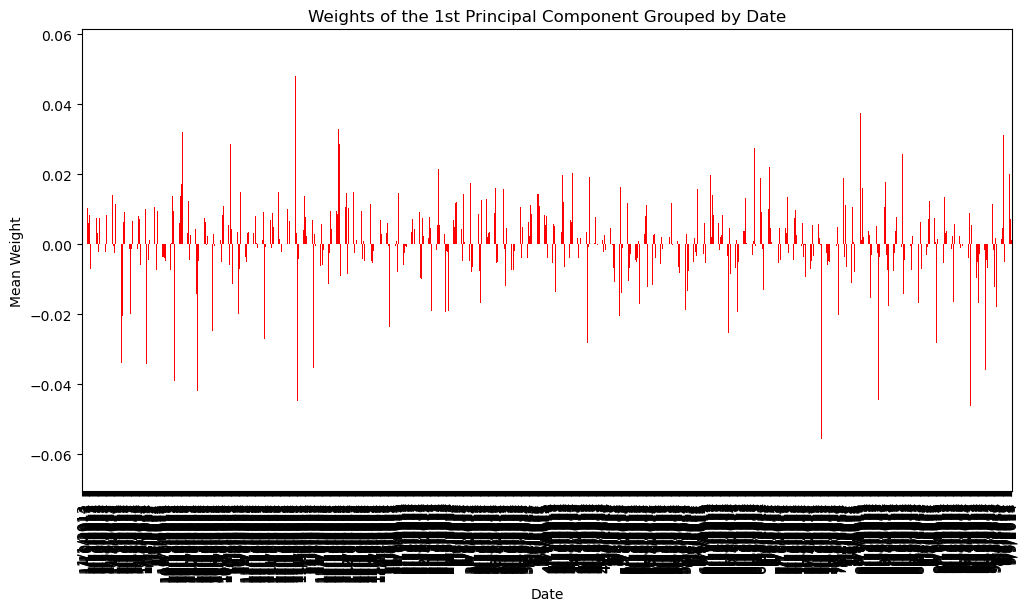


Summary Information:
Mean weights by date:
date
1/1/2013     0.020573
1/1/2014    -0.015231
1/10/2011    0.006747
1/10/2012   -0.006307
1/10/2013   -0.006316
               ...   
9/8/2011    -0.033484
9/8/2014    -0.002972
9/9/2011     0.020276
9/9/2013     0.007255
9/9/2014     0.001245
Name: Log_Return, Length: 1042, dtype: float64

Weights of the 1st principal component:
[-1.]


In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Path to the dataset file
df = pd.read_csv('SP500_close_price_no_missing.csv')

# Assuming there's a column named 'Date' in your dataset
date_column = 'date'

# Derive log returns
df['Log_Return'] = np.log(df['MMM'].shift(-1) / df['MMM'])

# Drop the last row as it will have NaN value after log return calculation
df = df.dropna()

# Extract log returns as features for PCA
X = df[['Log_Return']].values

# Fit a PCA model
pca = PCA()
X_pca = pca.fit_transform(X)

# Get the weights of the 1st principal component
weights_1st_component = pca.components_[0]

# Map weights to corresponding dates
weights_by_date = df.groupby(date_column)['Log_Return'].mean()

# Create a bar plot of mean weight per date
plt.figure(figsize=(12, 6))
weights_by_date.plot(kind='bar', color=np.where(weights_1st_component >= 0, 'green', 'red'))
plt.title('Weights of the 1st Principal Component Grouped by Date')
plt.xlabel('Date')
plt.ylabel('Mean Weight')
plt.show()

# Print some summary information
print("\nSummary Information:")
print("Mean weights by date:")
print(weights_by_date)
print("\nWeights of the 1st principal component:")
print(weights_1st_component)


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations

# Load the BMI dataset
df = pd.read_csv('BMI.csv')

# Drop rows with missing values
df = df.dropna()

# Define the target variable and features
target_variable = 'fatpctg'
features = [col for col in df.columns if col != target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target_variable], test_size=0.2, random_state=42
)

def evaluate_features(features, X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train[features], y_train)
    y_pred = model.predict(X_test[features])
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Backward Stepwise Regression
def backward_stepwise_regression(features, X_train, X_test, y_train, y_test):
    best_features = features.copy()
    best_mse = evaluate_features(best_features, X_train, X_test, y_train, y_test)

    for _ in range(len(features) - 1):
        mse_list = []
        for subset in combinations(best_features, len(best_features) - 1):
            mse = evaluate_features(list(subset), X_train, X_test, y_train, y_test)
            mse_list.append((mse, subset))

        best_mse, best_features = min(mse_list, key=lambda x: x[0])

    return best_features

# Forward Stepwise Regression
def forward_stepwise_regression(features, X_train, X_test, y_train, y_test):
    best_features = []
    remaining_features = set(features)

    while remaining_features:
        mse_list = []
        for feature in remaining_features:
            candidate_features = best_features + [feature]
            mse = evaluate_features(candidate_features, X_train, X_test, y_train, y_test)
            mse_list.append((mse, candidate_features))

        best_mse, best_features = min(mse_list, key=lambda x: x[0])
        remaining_features = set(best_features) - set(best_features[:-1])

    return best_features

# Backward Stepwise Regression
best_features_backward = backward_stepwise_regression(features, X_train, X_test, y_train, y_test)
print("Best features (Backward Stepwise):", best_features_backward)

# Forward Stepwise Regression
best_features_forward = forward_stepwise_regression(features, X_train, X_test, y_train, y_test)
print("Best features (Forward Stepwise):", best_features_forward)


Best features (Backward Stepwise): ('Abdomen',)
Best features (Forward Stepwise): ['Abdomen', 'Abdomen']


In [22]:
import pandas as pd

# Load the BMI dataset
df = pd.read_csv('BMI.csv')

# Drop rows with missing values
df = df.dropna()

# Define the target variable and features
target_variable = 'fatpctg'
features = [col for col in df.columns if col != target_variable]

# Calculate correlation between each feature and the target variable
correlations = df[features].corrwith(df[target_variable])

# Rank features based on absolute correlation values
ranked_features = correlations.abs().sort_values(ascending=False)

# Display the ranked features
print("Ranking of Features (Filter Method - Correlation):")
print(ranked_features)


Ranking of Features (Filter Method - Correlation):
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
dtype: float64


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# Load the BMI dataset
df = pd.read_csv('BMI.csv')

# Drop rows with missing values
df = df.dropna()

# Define the target variable and features
target_variable = 'fatpctg'
features = [col for col in df.columns if col != target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target_variable], test_size=0.2, random_state=42
)

# (1) Lasso Regression
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)

lasso_coefficients = pd.Series(lasso_model.coef_, index=features)
lasso_ranked_features = lasso_coefficients.abs().sort_values(ascending=False)

print("Ranking of Features (Embedded - Lasso Regression):")
print(lasso_ranked_features)

# (2) Random Forest (Feature Importance Ranking)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_model.fit(X_train, y_train)

rf_feature_importances = pd.Series(rf_model.feature_importances_, index=features)
rf_ranked_features = rf_feature_importances.sort_values(ascending=False)

print("\nRanking of Features (Embedded - Random Forest):")
print(rf_ranked_features)


Ranking of Features (Embedded - Lasso Regression):
Wrist      2.109029
Abdomen    0.980187
Neck       0.422322
Biceps     0.314264
Forearm    0.232864
Thigh      0.160673
Ankle      0.134259
Hip        0.127771
Chest      0.078316
Height     0.066845
Age        0.064426
Weight     0.058331
Knee       0.004095
dtype: float64

Ranking of Features (Embedded - Random Forest):
Abdomen    0.714957
Weight     0.031164
Wrist      0.030504
Height     0.029040
Hip        0.028463
Neck       0.026902
Chest      0.024049
Age        0.023840
Ankle      0.019951
Biceps     0.019619
Knee       0.019410
Forearm    0.016606
Thigh      0.015493
dtype: float64
